# Humour classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 1. Read cleaned data

In [ ]:
from google.colab import files
uploads = files.upload()

Saving cleaned_data.pkl to cleaned_data.pkl


In [ ]:
with open('cleaned_data.pkl', 'rb') as f:
  data = pickle.load(f)

In [ ]:
data[:10]

['potoroos live thick bush shrubs make tunnel paths bush get around easily',
 'shish kebabs cook grill skewer hot coal wood kababs originate iran afghanistan spread turkey pakistan india various part arabia',
 'charm quarks c quarks third massive six quarks like quarks think small divide',
 'iron react air water make rust rust flake iron expose allow iron rust',
 'bear know attack humans many reason actually avoid attack one reason surprise bear likely attack',
 'privacy issue refer case government employer gather data balance right concern technology alter social landscape easy',
 'process way think cognitive psychology science study cognition',
 'thing keep people reach union bad karma bad karma teach cause pride anger greed attachment lust sikhs try stay away things',
 'good climbers swimmers bobcats eat cougars coyotes wolves owls bobcats usually live 10 14 years',
 'inflation mean general level price go opposite deflation economists measure inflation regularly know economys state 

---------------------

## 2. Read embeddings from file

In [ ]:
from google.colab import files
uploads = files.upload()

Saving data_labels.pkl to data_labels.pkl


### 2.1 Embeddings for Logistic Regression

In [ ]:
with open('embeddings_tfidf.pkl', 'rb') as f:
  embeddings_tfidf = pickle.load(f)

In [ ]:
embeddings_tfidf.shape

(7880, 29354)

In [ ]:
with open('embeddings_trained_lr.pkl', 'rb') as f:
  embeddings_trained_lr = pickle.load(f)

In [ ]:
embeddings_trained_lr.shape

(7880, 100)

In [ ]:
with open('embeddings_pretrained_lr.pkl', 'rb') as f:
  embeddings_pretrained_lr = pickle.load(f)

In [ ]:
embeddings_pretrained_lr.shape

(7880, 300)

### 2.2 Embeddings for LSTM

In [ ]:
with open('embeddings_trained_lstm.pkl', 'rb') as f:
  embeddings_trained_lstm = pickle.load(f)

In [ ]:
embeddings_trained_lstm[0].shape

(12, 100)

In [ ]:
with open('embeddings_pretrained_lstm.pkl', 'rb') as f:
  embeddings_pretrained_lstm = pickle.load(f)

In [ ]:
embeddings_pretrained_lstm[0].shape

(13, 300)

---------------------------------

## 3. Train-Test split

### 3.1 Target variable

In [ ]:
with open('data_labels.pkl', 'rb') as f:
  y = pickle.load(f)

In [ ]:
len(y)

7880

### 3.2 Splitting data into train and test

In [ ]:
def split_train_test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  return X_train, X_test, y_train, y_test

-----------------

## 4. Models

### 4.1 Logistic Regression

In [ ]:
LR = LogisticRegression()

#### 4.1.1 LR on TF-IDF

In [ ]:
X_train, X_test, y_train, y_test = split_train_test(embeddings_tfidf, y)


In [ ]:
LR.fit(X_train, y_train)
acc = LR.score(X_test, y_test)

acc

0.9338715878508266

#### TFIDF LR Heatmap

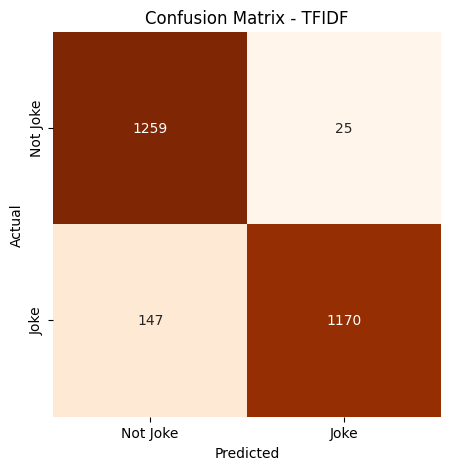

In [ ]:
# Get preds
y_pred = LR.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Not Joke', 'Joke'],
            yticklabels=['Not Joke', 'Joke'])
plt.title('Confusion Matrix - TFIDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### TFIDF ROC and Precision-Recall

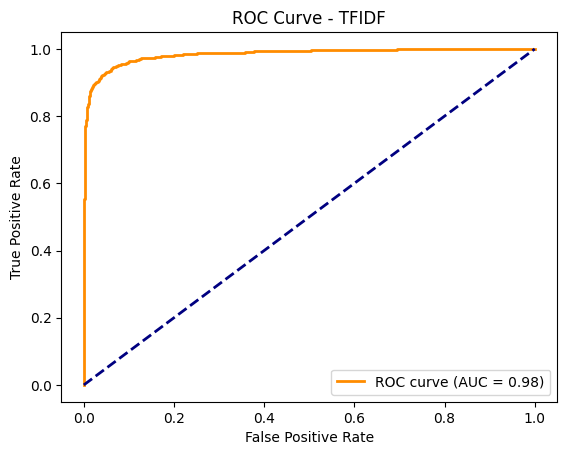

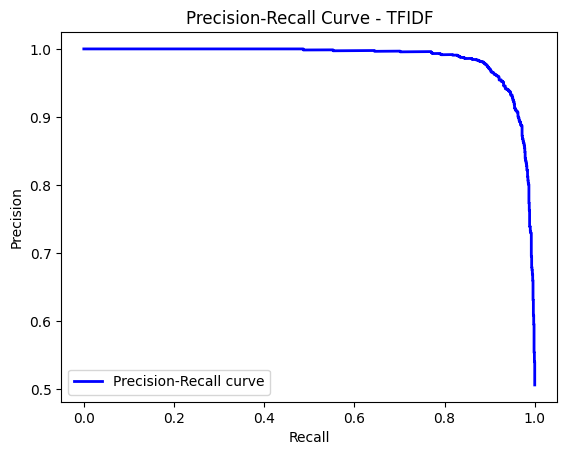

In [ ]:
# Get preds
y_pred_proba = LR.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - TFIDF')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - TFIDF')
plt.legend(loc="lower left")
plt.show()

#### 4.1.2 LR on embeddings from trained model

In [ ]:
X_train, X_test, y_train, y_test = split_train_test(embeddings_trained_lr, y)

In [ ]:
LR.fit(X_train, y_train)
acc = LR.score(X_test, y_test)

acc

0.9096501345636294

#### Confusion Matrix - Trained Embeddings

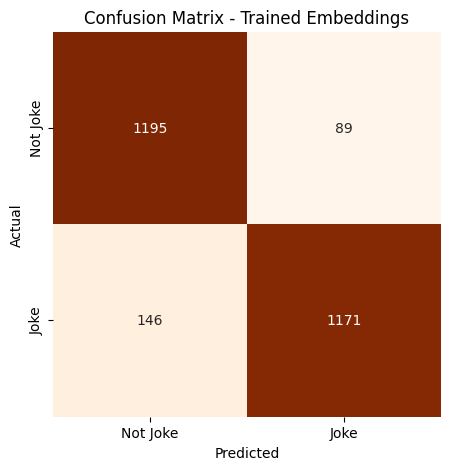

In [ ]:
# Get preds
y_pred = LR.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Not Joke', 'Joke'],
            yticklabels=['Not Joke', 'Joke'])
plt.title('Confusion Matrix - Trained Embeddings')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Trained Embeddings ROC and Precision-Recall

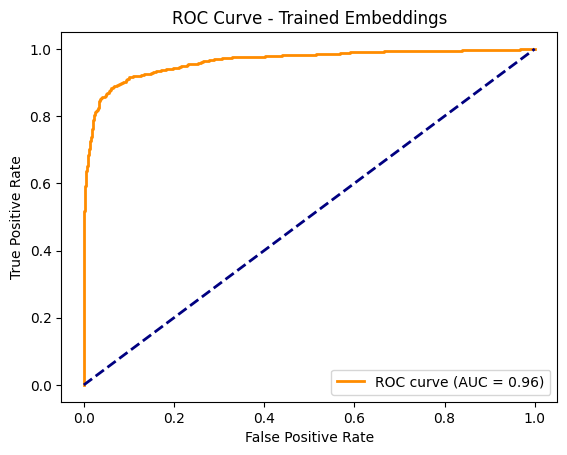

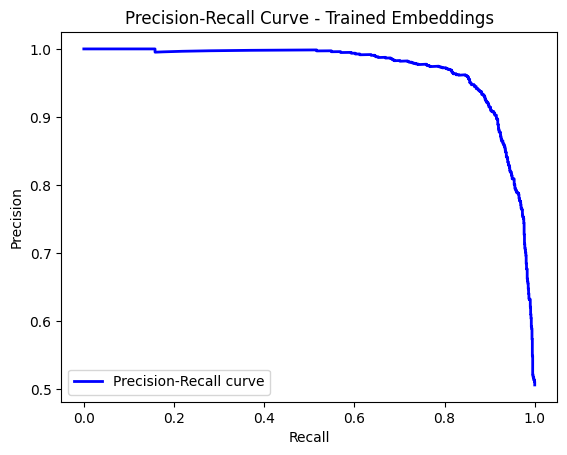

In [ ]:
# Get preds
y_pred_proba = LR.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Trained Embeddings')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Trained Embeddings')
plt.legend(loc="lower left")
plt.show()

#### 4.1.3 LR on embeddings from pretrained model

In [ ]:
X_train, X_test, y_train, y_test = split_train_test(embeddings_pretrained_lr, y)

In [ ]:
LR.fit(X_train, y_train)
acc = LR.score(X_test, y_test)

acc

0.9357939254133025

#### Confusion Matrix - Pretrained embeddings

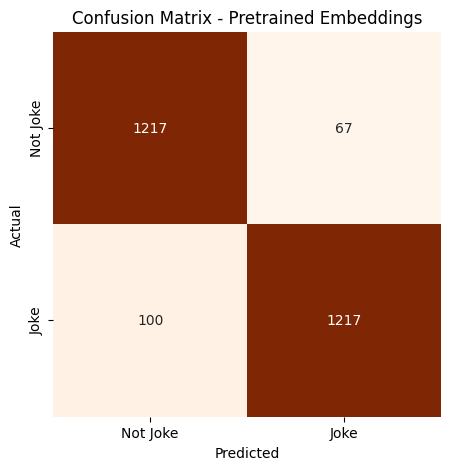

In [ ]:
# Get Preds
y_pred = LR.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Not Joke', 'Joke'],
            yticklabels=['Not Joke', 'Joke'])
plt.title('Confusion Matrix - Pretrained Embeddings')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Pretrained Embeddings ROC and Precision-Recall

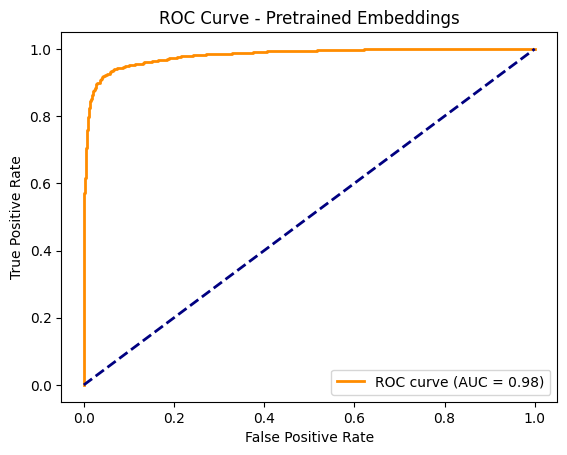

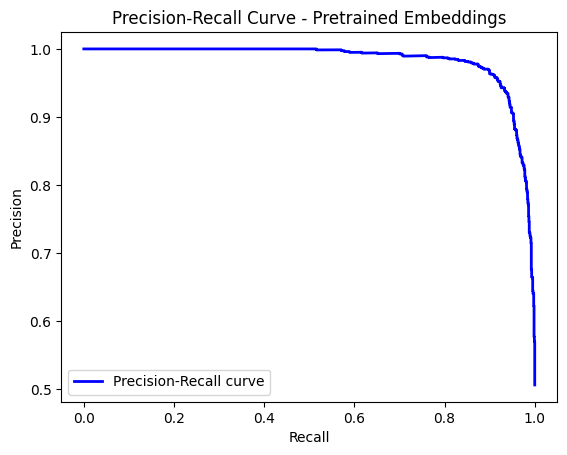

In [ ]:
# Get preds
y_pred_proba = LR.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Pretrained Embeddings')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Pretrained Embeddings')
plt.legend(loc="lower left")
plt.show()

### 4.2 LSTM

In [ ]:
def compile_model(X_train, y_train, X_test, y_test):
    model = Sequential([
      layers.LSTM(100),
      layers.Dense(33, activation='relu'),
      layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10
    )

    print(history)
    return history, model

In [ ]:
# Sequence length
input_len = 200

In [ ]:
def get_data_for_model(X, y):
  # Split data into train and test
  X_train, X_test, y_train, y_test = split_train_test(X, y)

  # Padding or truncating sequences to match the expected length
  X_train_padded = pad_sequences(X_train,
                               maxlen=input_len,
                               value=[0] * X_train[0].shape[-1],
                               dtype='float32')

  X_test_padded = pad_sequences(X_test,
                              maxlen=input_len,
                              value=[0] * X_test[0].shape[-1],
                              dtype='float32')


  y_train_array = np.array(y_train)
  y_test_array = np.array(y_test)

  return X_train_padded, X_test_padded, y_train_array, y_test_array

In [ ]:
def train_lstm_model(X, y, saved_model_name):
  X_train, X_test, y_train, y_test = get_data_for_model(X, y)

  print(X_train.shape)

  history, model = compile_model(X_train, y_train, X_test, y_test)

  model.save(saved_model_name)

#### 4.2.2 LSTM on embeddings obtained from trained model

In [ ]:
train_lstm_model(embeddings_trained_lstm, y, "LSTM_trained.keras")

(5279, 200, 100)
Epoch 1/10
165/165 [==============================] - 33s 185ms/step - loss: 0.2493 - accuracy: 0.8992 - val_loss: 0.1640 - val_accuracy: 0.9381
Epoch 2/10
165/165 [==============================] - 31s 191ms/step - loss: 0.1879 - accuracy: 0.9240 - val_loss: 0.1663 - val_accuracy: 0.9366
Epoch 3/10
165/165 [==============================] - 31s 189ms/step - loss: 0.1691 - accuracy: 0.9328 - val_loss: 0.1408 - val_accuracy: 0.9431
Epoch 4/10
165/165 [==============================] - 31s 190ms/step - loss: 0.1628 - accuracy: 0.9360 - val_loss: 0.1447 - val_accuracy: 0.9469
Epoch 5/10
165/165 [==============================] - 31s 190ms/step - loss: 0.1665 - accuracy: 0.9379 - val_loss: 0.1496 - val_accuracy: 0.9412
Epoch 6/10
165/165 [==============================] - 37s 226ms/step - loss: 0.1631 - accuracy: 0.9346 - val_loss: 0.1518 - val_accuracy: 0.9427
Epoch 7/10
165/165 [==============================] - 39s 237ms/step - loss: 0.1502 - accuracy: 0.9396 - val_loss

#### 4.2.3 Visualizations on embeddings obtained from trained model - ROC and Precision- Recall

82/82 [==============================] - 4s 46ms/step


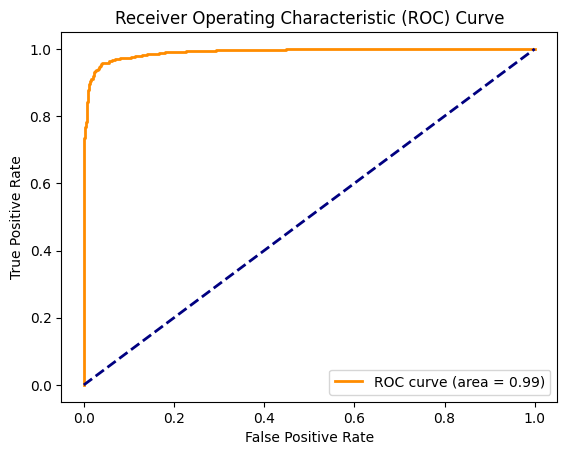

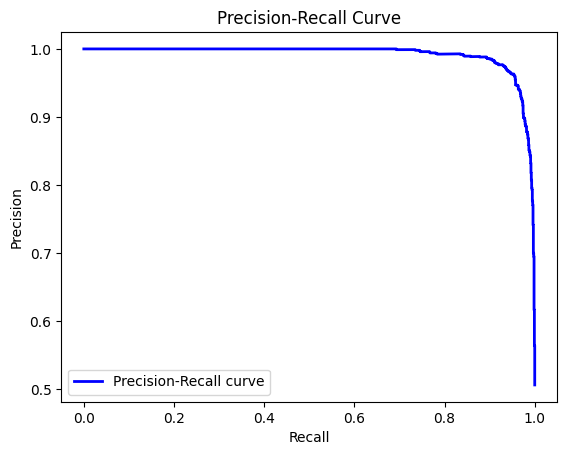

Accuracy: 0.9511726259131104


In [ ]:
#load model
model = load_model("LSTM_trained.keras")
X_train, X_test, y_train, y_test = get_data_for_model(embeddings_trained_lstm, y)

y_pred = model.predict(X_test)

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Calculate Accuracy
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")



####  LSTM Confusion Matrix Heatmap - Trained Embeddings

82/82 [==============================] - 4s 43ms/step


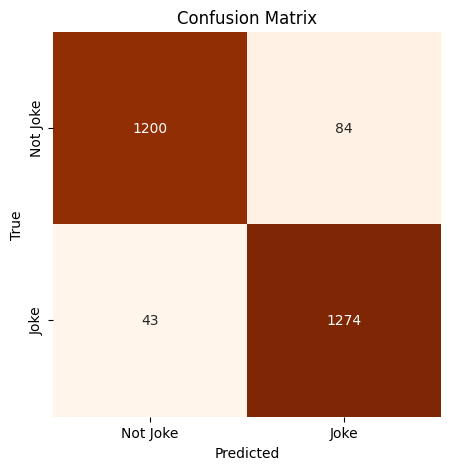

In [ ]:
y_pred_probs = loaded_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

class_names = ['Not Joke', 'Joke']


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names, yticklabels=class_names, cbar = False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### 4.2.3 LSTM on embeddings obtained from pre-trained model

In [ ]:
train_lstm_model(embeddings_pretrained_lstm, y, "LSTM_pretrained.keras")

(5279, 200, 300)
Epoch 1/10
165/165 [==============================] - 75s 431ms/step - loss: 0.2250 - accuracy: 0.9106 - val_loss: 0.1159 - val_accuracy: 0.9558
Epoch 2/10
165/165 [==============================] - 68s 409ms/step - loss: 0.1118 - accuracy: 0.9610 - val_loss: 0.1105 - val_accuracy: 0.9616
Epoch 3/10
165/165 [==============================] - 70s 427ms/step - loss: 0.0976 - accuracy: 0.9668 - val_loss: 0.1244 - val_accuracy: 0.9527
Epoch 4/10
165/165 [==============================] - 58s 351ms/step - loss: 0.1115 - accuracy: 0.9583 - val_loss: 0.1158 - val_accuracy: 0.9604
Epoch 5/10
165/165 [==============================] - 58s 351ms/step - loss: 0.0648 - accuracy: 0.9756 - val_loss: 0.1100 - val_accuracy: 0.9616
Epoch 6/10
165/165 [==============================] - 59s 356ms/step - loss: 0.0485 - accuracy: 0.9828 - val_loss: 0.1206 - val_accuracy: 0.9631
Epoch 7/10
165/165 [==============================] - 58s 352ms/step - loss: 0.0388 - accuracy: 0.9873 - val_loss

#### LSTM Pretrained Embeddings ROC and Precision Recall

82/82 [==============================] - 8s 95ms/step


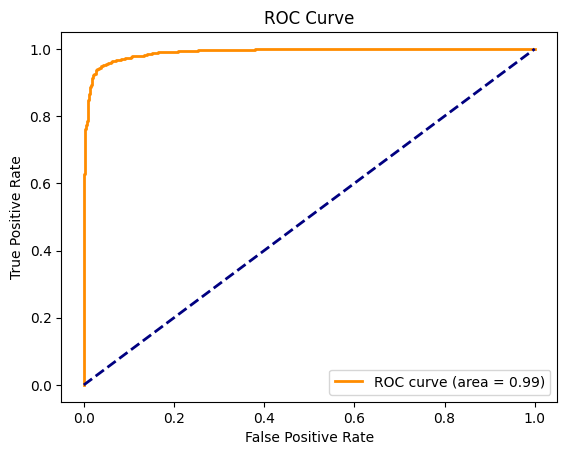

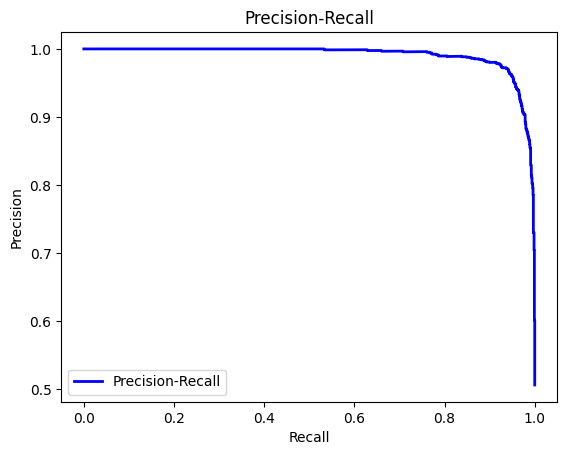

Accuracy: 0.9519415609381008


In [ ]:
#load model
model = load_model("LSTM_pretrained.keras")
X_train, X_test, y_train, y_test = get_data_for_model(embeddings_pretrained_lstm, y)

y_pred = model.predict(X_test)

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()

# Calculate Accuracy
y_pred_binary = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

#### LSTM PreTrained Embeddings Confusion Matrix Heatmap

82/82 [==============================] - 10s 110ms/step


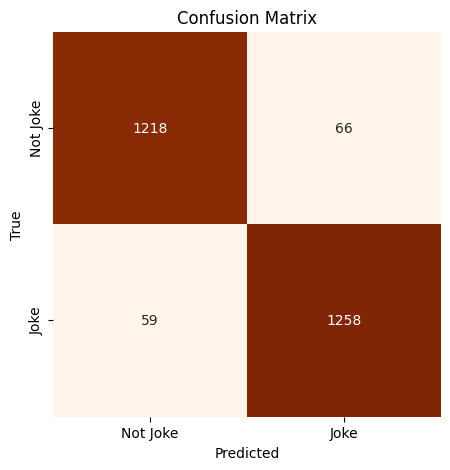

In [ ]:
# Get preds
y_pred_probs = loaded_model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

class_names = ['Not Joke', 'Joke']


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=class_names, yticklabels=class_names, cbar = False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()